Derin öğrenmedeki son gelişmeler, Görüntü ve konuşma tanıma gibi görevleri mümkün kıldı.

Derin Öğrenme: Kalıpları tanımada çok iyi olan ancak genellikle çok sayıda veri gerektiren bir Makine Öğrenimi Algoritma alt kümesi.
Derin öğrenme, her katmanın görüntünün bir veya daha fazla özelliğini çıkarmaktan sorumlu olduğu 3 veya daha fazla yapay sinir ağı katmanı kullanılarak uygulandığı için görüntülerdeki nesneleri tanımada mükemmeldir (daha sonra anlatacağız).

Sinir Ağı: İnsan beynindeki nöronlara benzer şekilde çalışan bir hesaplama modeli. Her nöron bir girdi alır, bazı işlemler yapar ve çıktıyı bir sonraki nörona iletir.

İlk kısımda bazı görüntüleri modelimizin 10 kategoriye ayırmasını isteyeceğiz.



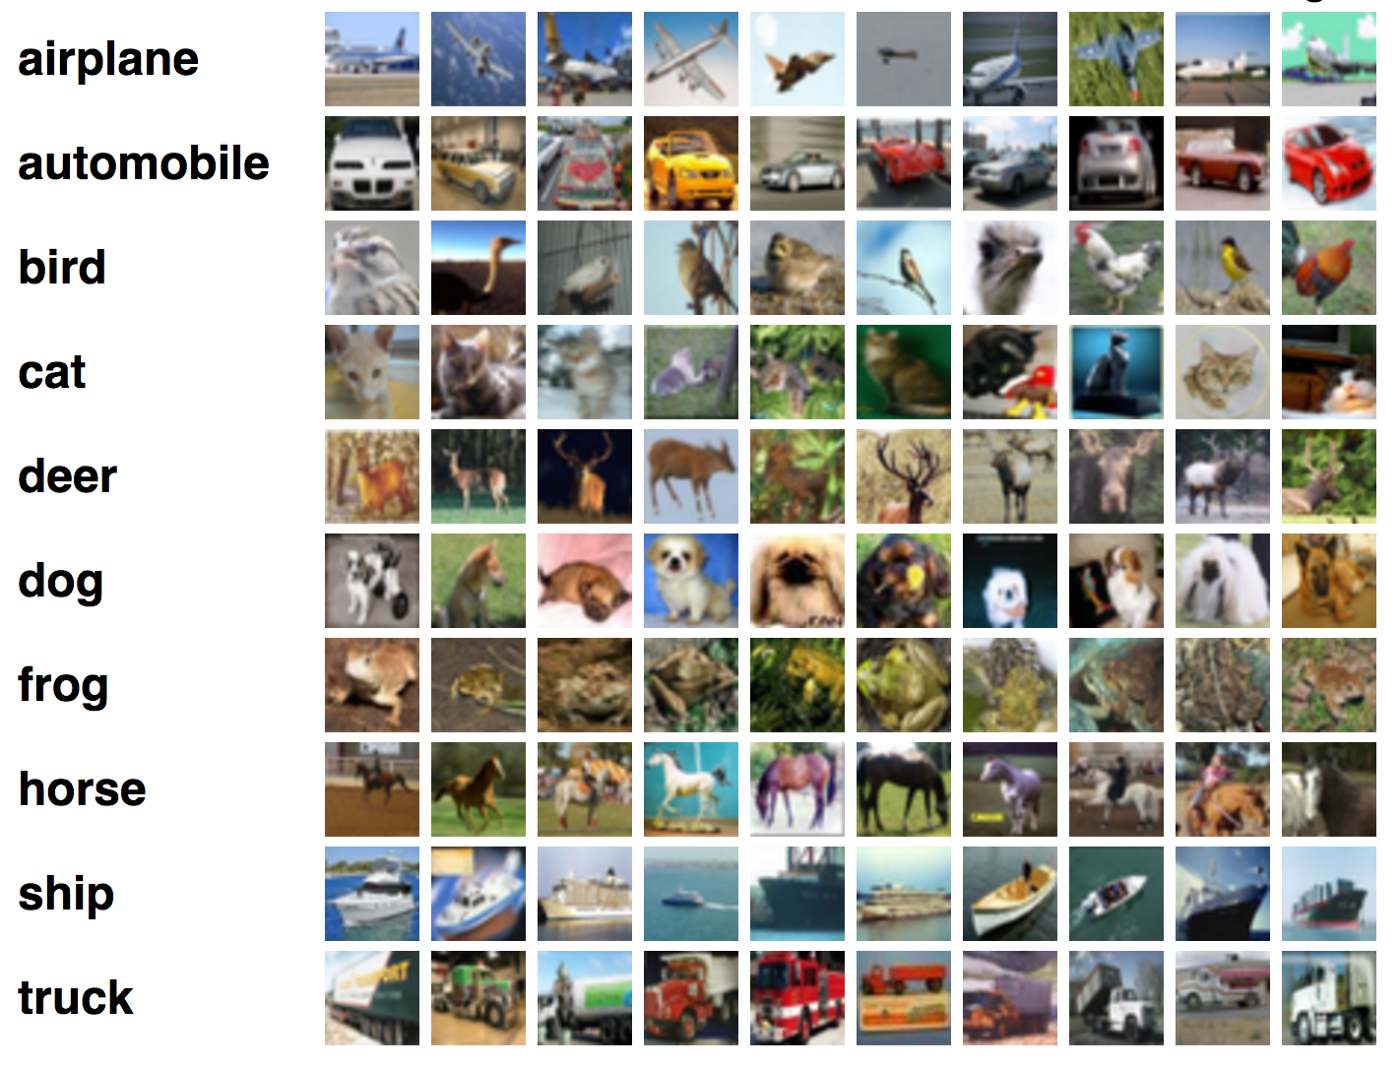

Bunu yapmak için, yeni bir nesneyi tanımadan önce bilgisayara bir kedinin, bir köpeğin, bir kuşun vb. nasıl göründüğünü öğretmemiz gerekir. 

Bilgisayar ne kadar çok kedi görürse, kedileri tanımada o kadar iyi olur. Bu, denetimli öğrenme olarak bilinir. Bu görevi görüntüleri etiketleyerek taşıyabiliriz, bilgisayar kedi resimlerinde bulunan ve diğer kedi resimlerinde olmayan desenleri tanımaya başlayacak ve kendi bilişini oluşturmaya başlayacaktır.

Programı yazmak için Python ve TensorFlow kullanacağız. TensorFlow, geliştiricilere her bir nöron (TensorFlow'da "düğüm" olarak bilinir) üzerinde ayrıntılı kontrol sağlayan, ağırlıkları ayarlayabilmeniz ve optimum performans elde edebilmeniz için Google tarafından oluşturulan açık kaynaklı bir derin öğrenme çerçevesidir. TensorFlow'da birçok yerleşik kitaplık (birkaç tanesini görüntü sınıflandırması için kullanacağız) vardır ve harika bir topluluğa sahiptir, bu nedenle hemen hemen her derin öğrenme konusu için açık kaynak uygulamaları bulabileceksiniz.
Bilgisayara görüntüleri sınıflandırmayı öğretelim!

**Image Processing**

Bilgisayarlar sayılar üzerinde hesaplamalar yapabilir ve görüntüleri bizim yaptığımız şekilde yorumlayamaz. Bilgisayarın anlaması için görüntüleri bir şekilde sayılara çevirmeliyiz.
Görüntü İşleme'de bunu yapmanın iki yaygın yolu vardır:

1. Greyscale:

Görüntü  greyscale (gri tonlama-beyazdan siyaha gri ton aralığı) dönüştürülecek bilgisayar her piksele ne kadar karanlık olduğuna bağlı olarak bir değer atayacaktır. Tüm sayılar bir array'e konur ve bilgisayar bu array üzerinde hesaplamalar yapar. 


2.  RGB Values:

Renkler RGB değerleri olarak gösterilebilir (0 ile 255 arasında değişen red, green ve blue kombinasyonu). Bilgisayarlar daha sonra her pikselin RGB değerini çıkarabilir ve sonucu yorumlama için bir array'e koyabilir.

Bilgisayar yeni bir görüntüyü yorumladığında, aynı tekniği kullanarak görüntüyü bir arraye dönüştürecek ve daha sonra sayı kalıplarını zaten bilinen nesnelerle karşılaştıracaktır. Bilgisayar daha sonra her sınıf için güven puanları tahsis eder. En yüksek güven puanına sahip sınıf genellikle tahmin edilen sınıftır.



**CNN**

Görüntü sınıflandırmanın doğruluğunu iyileştirmede kullanılan en popüler tekniklerden biridir CNN.


CNN: Başlangıçta bir convolutional katmanına sahip olması dışında normal bir sinir ağıyla aynı şekilde çalışan özel bir tür Sinir Ağları
tüm görüntüyü bir dizi sayı olarak beslemek yerine, görüntü birkaç parçaya bölünür, ardından makine her bir parçanın ne olduğunu tahmin etmeye çalışır. Son olarak bilgisayar, tüm karoların tahminine dayanarak resimde ne olduğunu tahmin etmeye çalışır. Bu, bilgisayarın işlemleri paralelleştirmesine ve görüntüde nerede olduğuna bakılmaksızın nesneyi algılamasına olanak tanır.

Image Processing

In [ ]:
def pre_process_image(image,training):
  #this function takes a single image as input
  #and a boolean whether to build the training or testing graph

  if training:
    #for training,add the following to the TenserFlow graph:

    #randomly crop the input image
    image=tf.random_crop(image,size=[img_size_cropped,img_size_cropped,num_channels])

    #randomly flip the image horizontally
    image=tf.image.random_flip_left_right(image)

    #randomly adjust hue,contrast and saturation
    image = tf.image.random_hue(image, max_delta=0.05)
    image = tf.image.random_contrast(image, lower=0.3, upper=1.0)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_saturation(image, lower=0.0, upper=2.0)

    #some of these functions may overflow and result in pixel
    #values beyond the [0,1] range. To feed neural networks we will limit 
    #the range.
    #limit the image pixels between [0,1] in case of overflow.
    image=tf.minimum(image,1.0)
    image=tf.maximum(image,0.0)
  
  else:
    #for training,add the following to the tenserflow graph
    #crop the input image around the centre so it is the same
    #size as images that are randomly cropped during training

    image=tf.image.resize_image_with_crop_or_pad((image,
                                                       target_height=img_size_cropped,
                                                       target_width=img_size_cropped)

    return image)

Splitting Data

In [ ]:
train_batch_size = 64
def random_batch():
    # Number of images in the training-set.
    num_images = len(images_train)

    # Create a random index.
    idx = np.random.choice(num_images,
                           size=train_batch_size,
                           replace=False)

    # Use the random index to select random images and labels.
    x_batch = images_train[idx, :, :, :]
    y_batch = labels_train[idx, :]

    return x_batch, y_batch

**Building a Convolutional Neural Network**

Bir Convolutional Neural Network oluşturma süreci her zaman dört ana adımı içerir.

Step - 1 : Convolution

Step - 2 : Pooling

Step - 3 : Flattening

Step - 4 : Full connection


In [ ]:
#importing the keras libraries and packages
from keras.models import Sequential
from keras.layers import *

*Sequential* :  Sinir ağı modelimizi sıralı bir ağ olarak başlatmak için keras.models'den Sequential.

*Conv2D* : Training görüntülerinde convolution  işlemini, yani bir CNN'nin ilk adımını gerçekleştirmek içindir. Burada temelde 2 Boyutlu arraylerden oluşan imageler üzerinde çalıştığımız için, Convolution 2-D kullanacağız, üçüncü boyutun zaman olacağı videolarla uğraşırken Convolution 3-D kullanmanız gerekebilir.

*MaxPooling2D* : Pooling işlemi için kullanılan, bu adım — bir cnn oluşturma sürecinde 2. adımdır. Bu özel sinir ağını oluşturmak için bir Maxpooling işlevi kullanıyoruz, Min Pooling, Mean Pooling, vb. gibi farklı havuzlama işlemleri var. Burada MaxPooling'de ilgili bölgeden maksimum değer pikseline ihtiyacımız var.

*Flatten* : Flattening işlemi elde edilen tüm 2 boyutlu arrayleri tek bir uzun sürekli doğrusal vektöre dönüştürme işlemidir.

*Dense* : CNN oluşturma sürecinde 4. adım olan sinir ağının tam bağlantısını gerçekleştirmek için kullanılır.

In [ ]:
#create an object of the sequential class
classifier=Sequential()

#Convolution step
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

Yukarıda öncelikle halihazırda sinir ağımızın nasıl olacağına dair bir fikri olan object'i aldık(sequential), ardından “Conv2D” fonksiyonunu kullanarak bir convolution katmanı ekledik. Conv2D işlevi 4 argüman alıyor, birincisi filtre(filter) sayısı yani burada 32, ikinci argüman her filtrenin olacağı şekil(shape) yani burada 3x3, üçüncüsü giriş şekli ve görüntünün türü (RGB veya Siyah ve Beyaz) her görüntünün yani CNN'nin alacağı giriş görüntüsü 64x64 çözünürlükte ve “3” renkli bir görüntü olan RGB'yi temsil ediyor, dördüncü argüman kullanmak istediğimiz aktivasyon fonksiyonu, burada ' relu' bir doğrultucu işlevi anlamına gelir.

Şimdi bir görüntü üzerinde convolution işlemi yapıldıktan sonra elde ettiğimiz özellik haritaları(feature maps) üzerinde pooling işlemi yapmamız gerekiyor. Bir pooling işleminin birincil amacı, görüntülerin boyutunu mümkün olduğunca küçültmektir.Burada anlaşılması gereken en önemli şey, sonraki katmanlar için toplam düğüm(node) sayısını azaltmaya çalıştığımızdır.

In [ ]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

Sınıflandırıcı nesnemizi alarak başlıyoruz ve pooling katmanını ekliyoruz. 2x2'lik bir matris alıyoruz, minimum piksel kaybına sahip olacağız ve özelliğin bulunduğu kesin bir bölge elde edeceğiz. Performansını düşürmeden modelin karmaşıklığını azalttık.

Şimdi, bir araya getirilen tüm görüntüleri Flatten yoluyla sürekli bir vektöre dönüştürmenin zamanı geldi. Flattening, anlamak için çok önemli bir adımdır. Burada temel olarak yaptığımız şey, 2 boyutlu diziyi, yani havuzlanmış görüntü piksellerini almak ve bunları tek boyutlu tek bir vektöre dönüştürmektir.

In [ ]:
classifier.add(Flatten())

Yukarıdaki kod oldukça açıklayıcıdır. Flatteningi gerçekleştirmek için Flatten işlevini kullandık, herhangi bir özel parametre eklememize gerek yok, keras "sınıflandırıcı" nesnesinin zaten pooling görüntü piksellerini tuttuğunu ve flattening gerektiğini anlayacaktır.

Bu adımda fully-connected bir katman oluşturmamız gerekiyor ve flatten adımından sonra elde ettiğimiz düğüm setini bu katmana bağlayacağız, bu düğümler bu fully-connected katmanlara bir giriş katmanı görevi görecek. Bu katman, girdi katmanı ile çıktı katmanı arasında olacağından gizli katman olarak adlandırabiliriz.

In [ ]:
classifier.add(Dense(units = 128, activation = 'relu'))

Gördüğünüz gibi, Dense, fully-connected bir katman ekleme işlevidir, 'units', bu gizli katmanda bulunması gereken düğüm sayısını tanımladığımız yerdir, bu birimlerin değeri her zaman giriş düğümlerinin sayısı ile çıkış düğümlerinin sayısı arasında olacaktır, ancak en uygun düğüm sayısını seçme sanatı yalnızca deneysel denemelerle elde edilebilir.

Şimdi, binary classification yaptığımızı düşüneliö ve bu sebeple yalnızca bir düğüm içeren gereken çıktı katmanımız olsun. Mesela bu tek düğüm bize bir Cat veya Dog'un ikili çıktısını verecektir.

In [ ]:
classifier.add(Dense(units=1,activation='sigmoid'))

Son katmanın yalnızca bir düğüm içerdiğini ve son katman için bir sigmoid aktivasyon işlevi kullanacağımızı görebilirsiniz.

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



1.   Optimize edici parametre, stokastik gradyan iniş algoritmasını seçmektir.
2.   Kayıp parametresi kayıp fonksiyonunu seçmektir.

3.  Son olarak, metrik parametresi performans metriğini seçmektir.




Görüntüleri modellere sokmadan önce overfitting önlemek için görüntüleri ön işleme tabi tutmamız gerekiyor. Overfitting, düğümlerin bir katmandan diğerine fazla takılması nedeniyle harika bir training doğruluğu ve çok düşük test doğruluğu elde ettiğiniz zamandır.
Bu yüzden görüntülerimizi sinir ağına sığdırmadan önce, üzerlerinde temel olarak eğitim verilerini sentezleyen bazı görüntü büyütmeleri yapmamız gerekiyor. Bunu sentezleme kısmını yapmak için keras.preprocessing kitaplığını kullanarak yapacağız ve ayrıca eğitim setini ve ayrıca dizin adının alındığı düzgün yapılandırılmış dizinlerde bulunan test test setini hazırlayacağız. Örneğin : 'cats' adlı klasörün içindeki tüm resimler keras tarafından kedi olarak kabul edilecektir.

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, #
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory('training_set',
                                               target_size=(64,64),
                                               batch_size = 32,
                                               class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test_set',
target_size = (64, 64),
batch_size = 32,
class_mode = 'binary')

Parametre *rescale*, preprocessing görüntüsündeki her pikseli çarpmaktır. Peki neden 1./255? Kısaca, rescale=1./255, [0,255] aralığındaki pikselleri [0,1] aralığına dönüştürür.
Her dijital görüntü 0-255 aralığında değere sahip piksellerden oluşur. 0 siyah ve 255 beyazdır. Renkli görüntü için üç harita içerir: Kırmızı, Yeşil ve Mavi ve tüm pikseller hala 0-255 aralığındadır. 

255, maksimum piksel değeri olduğundan. Yeniden ölçeklendirme 1./255, [0,255] -> [0,1] aralığındaki her piksel değerini dönüştürmektir. 

*shear_range*=0.2, görüntüyü %20 oranında kırpmak anlamına gelir. *zoom_range*, %20 oranında yakınlaştırma ve uzaklaştırma anlamına gelir.

*horizontal_flip*,temel olarak hem satırları hem de sütunları yatay olarak çevirir.

ImageDataGenerator sınıfı, büyük bir sayısal array'den ve görüntüleri içeren klasörlerden görüntüleri okumak için flow(), flow_from_directory() ve flow_from_dataframe() olmak üzere üç yönteme sahiptir.

In [ ]:
classifier.fit_generator(training_set,
steps_per_epoch = 8000,
epochs = 25,
validation_data = test_set,
validation_steps = 2000)

Yukarıdaki kodda, 'steps_per_epoch', training görüntülerinin sayısını, yani training_set klasörünün içerdiği görüntülerin sayısını tutar.
Ve 'epochs', tek bir epoch, bir sinir ağının eğitiminde tek bir adımdır; başka bir deyişle, bir sinir ağı her training örneğinde yalnızca bir geçişte eğitildiğinde, bir çağın bittiğini söylüyoruz. Yani training süreci birden fazla epochtan oluşmalıdır. Bu durumda 25 epoch tanımladık.

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',
                          target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices
if result[0][0] ==1:
  prediction = 'dog'
else:
  prediction = 'cat'

test_image, CNN'de test edilmesi gereken görüntüyü tutar. Test görüntüsüne sahip olduğumuzda, model sadece bu çözünürlük dışında olduğu için çözünürlüğünü 64x64'e çevirerek modele gönderilecek görüntüyü hazırlayacağız. Ardından, tahmini elde etmek için sınıflandırıcı nesnemizde predict() yöntemini kullanıyoruz. Tahmin ikili biçimde olacağından, sırasıyla bir köpeği veya bir kediyi temsil edecek olan 1 veya 0 alacağız.